### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [12]:
import numpy as np
help(np.rank)

Help on function rank in module numpy.core.fromnumeric:

rank(a)
    Return the number of dimensions of an array.
    
    If `a` is not already an array, a conversion is attempted.
    Scalars are zero dimensional.
    
    .. note::
        This function is deprecated in NumPy 1.9 to avoid confusion with
        `numpy.linalg.matrix_rank`. The ``ndim`` attribute or function
        should be used instead.
    
    Parameters
    ----------
    a : array_like
        Array whose number of dimensions is desired. If `a` is not an array,
        a conversion is attempted.
    
    Returns
    -------
    number_of_dimensions : int
        The number of dimensions in the array.
    
    See Also
    --------
    ndim : equivalent function
    ndarray.ndim : equivalent property
    shape : dimensions of array
    ndarray.shape : dimensions of array
    
    Notes
    -----
    In the old Numeric package, `rank` was the term used for the number of
    dimensions, but in NumPy `ndim` is used

In [19]:
m = np.arange(12).reshape((3,4))
print(m)
a = m.flatten()
print('overall mean: ', a.mean())
print ("sum along the columns:", m.sum(axis=0))
print ("sum along the rows:", m.sum(axis=1))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
overall mean:  5.5
sum along the columns: [12 15 18 21]
sum along the rows: [ 6 22 38]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [46]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v), '\n')
#print(np.outer(v,u), '\n')

u_x_v = np.array([i*j for i in u for j in v])
m = u_x_v.reshape(4,4)
print(m, '\n')

print(u.reshape(4,1)*v, '\n')
print(v*u.reshape(4,1), '\n')
print(u.reshape(4,1)@v.reshape(1,4), '\n')

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 



3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [74]:
import numpy.random as npr
m = npr.rand(10,6)
print(m, '\n')
mask = (m < 0.1)

print(mask, '\n')
row_mask = np.any(mask, axis=1)
print(row_mask, '\n')
#m[row_mask] = np.zeros((6,1))
m[row_mask,:] = 0
print(m)


[[ 0.85757757  0.52801991  0.29919894  0.44245462  0.69915452  0.19514756]
 [ 0.585834    0.28011303  0.51828609  0.13080453  0.78426803  0.9269514 ]
 [ 0.42737733  0.0207486   0.53685432  0.58710583  0.53811281  0.52233198]
 [ 0.9618387   0.79006077  0.89313639  0.87956693  0.32418952  0.40638706]
 [ 0.18941905  0.21026513  0.04346818  0.36805173  0.20376377  0.16360627]
 [ 0.78898017  0.01839245  0.50446835  0.88667903  0.14600007  0.34662689]
 [ 0.02955119  0.05096263  0.82302437  0.114875    0.48909398  0.56837358]
 [ 0.80253855  0.84334123  0.15662761  0.43383648  0.14651225  0.23003388]
 [ 0.96618761  0.85382158  0.27083776  0.33784831  0.34521568  0.51492681]
 [ 0.93891515  0.88352354  0.26660317  0.20600296  0.57007521  0.76338539]] 

[[False False False False False False]
 [False False False False False False]
 [False  True False False False False]
 [False False False False False False]
 [False False  True False False False]
 [False  True False False False False]
 [ True  True

In [56]:
help(np.any)

Help on function any in module numpy.core.fromnumeric:

any(a, axis=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Test whether any array element along a given axis evaluates to True.
    
    Returns single boolean unless `axis` is not ``None``
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical OR reduction is performed.
        The default (`axis` = `None`) is to perform a logical OR over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.  It must have
        

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[ 0.          0.63466518  1.26933037  1.90399555  2.53866073  3.17332591
  3.8079911   4.44265628  5.07732146  5.71198664]
[ 5.71198664  5.07732146  4.44265628  3.8079911   3.17332591  2.53866073
  1.90399555  1.26933037  0.63466518  0.        ]
[ 0.76159822  0.82506474  3.87145761  3.93492413]


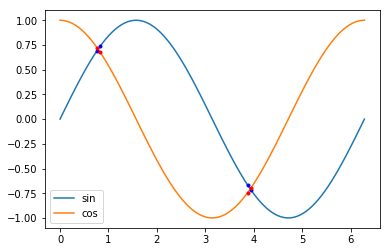

In [106]:
a = np.linspace(0,2*np.pi,100)
b = a[::10]
print(b)
b[::-1]
print(b[::-1])

mask = (np.abs(np.sin(a)-np.cos(a))<0.1)
#print(mask)
v = a[mask]
print(v)
#print(np.pi/4, np.pi*5/4)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a, np.sin(a), label = 'sin')
plt.plot(a, np.cos(a), label = 'cos')
plt.plot(v, np.sin(v), 'b.')
plt.plot(v, np.cos(v), 'r.')
plt.legend()
#plt.show()

In [75]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [120]:
a = np.arange(1,11)
b = a.reshape(10,1)
m = a*b
print(m, '\n')
m.trace()

#help(np.diag)
m1 = m[::-1]
print(np.diag(m1), '\n')

print(np.diag(m,1), '\n')

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

[10 18 24 28 30 30 28 24 18 10] 

[ 2  6 12 20 30 42 56 72 90] 



6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [127]:
cities = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = np.array([np.abs(x-y) for x in miles for y in miles]).reshape(10,10)
grid = np.triu(distances) * 1.6
print(grid)

[[    0.    316.8   484.8  1177.6  1393.6  1880.   2360.   2470.4  3060.8
   3916.8]
 [    0.      0.    168.    860.8  1076.8  1563.2  2043.2  2153.6  2744.
   3600. ]
 [    0.      0.      0.    692.8   908.8  1395.2  1875.2  1985.6  2576.
   3432. ]
 [    0.      0.      0.      0.    216.    702.4  1182.4  1292.8  1883.2
   2739.2]
 [    0.      0.      0.      0.      0.    486.4   966.4  1076.8  1667.2
   2523.2]
 [    0.      0.      0.      0.      0.      0.    480.    590.4  1180.8
   2036.8]
 [    0.      0.      0.      0.      0.      0.      0.    110.4   700.8
   1556.8]
 [    0.      0.      0.      0.      0.      0.      0.      0.    590.4
   1446.4]
 [    0.      0.      0.      0.      0.      0.      0.      0.      0.
    856. ]
 [    0.      0.      0.      0.      0.      0.      0.      0.      0.
      0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.